# Programming for Economics

## Problem Set 02 - Week 3 - Group 02

*31/01/23*

In [1]:
#Importing Packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
#Defining display options:

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]

In [3]:
#Importing dataset: 


os.chdir(r"C:\Users\icon8\Desktop\Programming for Economics\W3\PS02")
df = pd.read_excel("UNPS_1112_PS2.xls")

### Exercise 1. Exploring the data (25 points)

#### a. Are there duplicate households in the data? That is check if there are repeated observations in the unique household identifier variable (’hhid’).


In [4]:
#Check for duplicates:

df["hhid"].is_unique

#There are no duplicates in HHiD

True

In [5]:
#Check number of observations:

df["hhid"].count()

#There are 2,613 unique HHiDs

2613

#### b. Present some basic summary statistics for the following variables: head_gender, head _age, familysize, consumption, income, wealth. Comment your results in 2 lines. In particular, you might mention if there are missing observations or potential outliers for some of the variables.


In [6]:
#Define Summary Statistics:

sum_stats = df[['head_gender', 'head_age', 'familysize', 'consumption', 'income', 'wealth']].describe(percentiles=percentiles)
sum_stats

,head_gender,head_age,familysize,consumption,income,wealth
count,"2,597.00","2,597.00","2,597.00","2,613.00","2,613.00","2,613.00"
mean,1.31,46.07,7.48,"1,803.79","1,860.08","4,912.70"
std,0.46,15.07,3.71,"1,308.74","2,607.52","8,359.89"
min,1.00,14.00,1.00,250.31,27.49,0.00
5%,1.00,25.00,2.00,491.21,139.81,68.94
10%,1.00,28.00,3.00,604.29,212.14,165.15
25%,1.00,34.00,5.00,918.32,471.20,720.02
50%,1.00,44.00,7.00,"1,426.61","1,061.19","2,108.60"
75%,2.00,56.00,9.00,"2,296.86","2,234.80","5,221.94"
90%,2.00,68.40,12.00,"3,470.91","4,223.74","11,837.65"


___Comment on summary statistics:___

We see that head_gender is a binary variable with mostly male head of households
(mean: 1.3132 < 1.5). The age of households takes on a large range of 86 years, with most observations concentrated roughly between 34-56 years (Interquartile Range). Consumption, income, and wealth all have means considerably higher than their medians, implying positive skew due to  large positive outliers. To put the asymmetry of max/mins into perspective, we can find the ratio of the number of standard deviations of the minima and maxima of each variable from their respective medians:


In [7]:
#Find relative distance of min and maxes from median:

varlist = ['head_gender', 'head_age', 'familysize', 'consumption', 'income', 'wealth']
distance_from_median={}

for var in varlist:
    distance_from_median[f"{var}"] = abs(df[f"{var}"].max()-df[f"{var}"].quantile(.50))/df[f"{var}"].std(), abs(df[f"{var}"].min()-df[f"{var}"].quantile(.50))/df[f"{var}"].std()

pd.DataFrame(distance_from_median)

,head_gender,head_age,familysize,consumption,income,wealth
0,2.15,3.72,7.00,5.31,19.59,8.89
1,0.00,1.99,1.62,0.90,0.40,0.25


Consumption, income, and wealth have maxima that are over 5x further away (in terms of the # of std. dev.) from their respective medians than the minima. Finally, the difference between the counts() from the number of rows (2,613) implies the presence of missing (NaN) values. According to the table, there are 16 NaN values for head_gender, head_age, and familysize.

#### c. Using the head_gender variable, create a dummy variable for household head being female (1=female, 0=male). Be careful with missing values. What is the proportion of households where the head is female?

In [8]:
# Generating dummy variable

df['head_female'] = np.nan
df.loc[df['head_gender']==1, 'head_female'] = 0
df.loc[df['head_gender']==2, 'head_female'] = 1

In [9]:
# Calcuating the proportion of housegolds where the head is a female

proportion_female = df.head_female.sum() / df['head_female'].count()
print("The proportion of female to male heads of families is:", proportion_female)

The proportion of female to male heads of families is: 0.31420870234886406


#### d. Using the groupby method, compute the average consumption, average household size, and average household head age for households where the head is male vs where the head is female. Do we observe noticeable differences across the two groups?


In [10]:
#Averages of consumption, familysize, and household head age conditional on male or female:

averages_bygender = df[['consumption','familysize','head_age', 'head_female']].groupby(by="head_female").mean()  
averages_bygender

,consumption,familysize,head_age
head_female,,,
0.00,"1,898.30",7.72,44.39
1.00,"1,593.26",6.96,49.73


In [11]:
#Percent (%) difference in conditional averages (as a % of the average | male):
con_fam_age = ['consumption','familysize','head_age']
fm_perc_diff={}

for var in con_fam_age:
    fm_perc_diff[f"{var}"] = ((averages_bygender.loc[1,f"{var}"]/averages_bygender.loc[0,f"{var}"])-1)*100

pd.DataFrame(fm_perc_diff, index=["Female/Male (%) Difference:"])

,consumption,familysize,head_age
Female/Male (%) Difference:,-16.07,-9.91,12.04


__Comment on Differences:__

As a % of the conditional average for males, the conditional average of consumption for females heads is 16% lower; familysize, 10% lower; and head_age, 12% higher. In absolute terms:

In [12]:
#Absolute difference in conditional average (displacement from Avg. | male):


fm_abs_diff={}
for var in con_fam_age:
    fm_abs_diff[f"{var}"] = averages_bygender.loc[1,f"{var}"]-averages_bygender.loc[0,f"{var}"]
    
pd.DataFrame(fm_abs_diff, index=["Female-Male (abs) Difference:"])

,consumption,familysize,head_age
Female-Male (abs) Difference:,-305.04,-0.77,5.35


Relative to the averages conditional on male heads of households, female heads have an average consumption that is $305 lower. familysize about 1 person fewer, and age about 5 years older. 

It is difficult to comment on the causal relationships underlying these conditional averages without additional data or metadata. It is possible that average consumption is lower for female-headed families because of the smaller average family size and income (which in turn affects the attainable family size &rarr; simoultaneity bias). It is also possible that average family size is roughly one person fewer because for cultural reasons the female becomes the new head of household only if the male head passes away or leaves the family. We would need more information on the definition of "household head".


### Exercise 2. Inequality in Uganda (50 points).


#### a. Create the variables log_c, log_inc, log_w that are the log of consumption, income, and wealth, respectively. Plot in the same graph the distribution of the log of consumption and the log of income. Do the distributions resemble some known distribution? Is inequality higher in consumption or in income?

In [13]:
# Creating log values of consumption, income and wealth

df['log_consumption'] = np.log(df['consumption'])
df['log_income'] = np.log(df['income'])

In [14]:
#Wealth has values of zero which turn into -inf when transformed by log. Replace -inf with NaN:
print(df[['head_gender', 'head_age', 'familysize', 'consumption', 'income', 'wealth']].count())

df['log_wealth'] = np.log(df['wealth'])
df.replace([np.inf, -np.inf], np.nan, inplace = True) # Removing infinite values

print(df[['head_gender', 'head_age', 'familysize', 'log_consumption', 'log_income', 'log_wealth']].count()) 
#There were 16 -inf values in log of wealth (16 zero values in wealth)

head_gender    2597
head_age       2597
familysize     2597
consumption    2613
income         2613
wealth         2613
dtype: int64
head_gender        2597
head_age           2597
familysize         2597
log_consumption    2613
log_income         2613
log_wealth         2597
dtype: int64


C:\Users\icon8\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


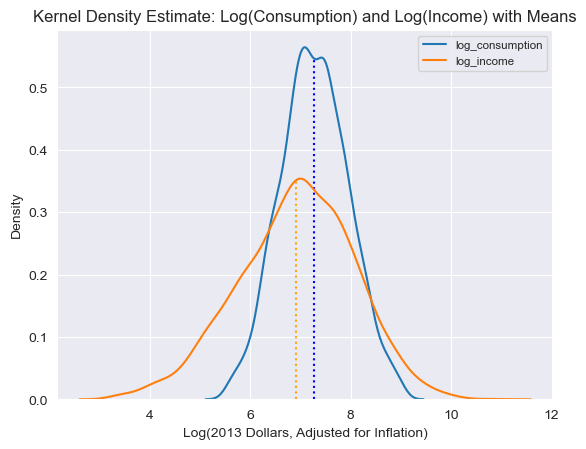

In [15]:
# Generating kernel density plot
fig, ax = plt.subplots()

#----------------- Consumption
fig = sns.kdeplot(df["log_consumption"], shade=False, label='log_consumption')

kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = df["log_consumption"].mean()
ax.vlines(middle, 0, np.interp(middle, xs, ys), color='blue', ls=':')

#----------------- Income
fig = sns.kdeplot(df["log_income"], shade=False, label='log_income')

kdeline = ax.lines[1]
ws = kdeline.get_xdata()
zs = kdeline.get_ydata()
middle = df["log_income"].mean()
ax.vlines(middle, 0, np.interp(middle, ws, zs), color='orange', ls=':')

#----------------Shared Plot

plt.legend(fontsize='small')
plt.xlabel('Log(2013 Dollars, Adjusted for Inflation)')
plt.title("Kernel Density Estimate: Log(Consumption) and Log(Income) with Means")
plt.show()

In [16]:
#Distribution variance, skew, and kurtosis

pd.DataFrame([[df["log_income"].kurtosis(), df["log_consumption"].kurtosis()],[df["log_income"].var(), df["log_consumption"].var()],[df["log_income"].skew(), df["log_consumption"].skew()]], columns=["income","consumption"],index=["kurtosis",'variance','skew'])

,income,consumption
kurtosis,-0.04,-0.32
variance,1.34,0.45
skew,-0.22,0.04


Inequality is high when there are many households at the low end of income/consumption and a small number of households at the high end (i.e., the top percentiles of wealth own a large proportion of total wealth). Both log(consumptions) and log(income) are approximately normally distributed, but the distribution of log(income) has a slight negative skew with a relatively heavy tail, indicating a large proportion of people in the low-middle income percentiles. Contrastingly, log(consumption) is relatively concentrated about its mean, reflecting a much smaller dispersion of log(consumption) for sampled households. 

We must remember that by taking the logarithm, we are compressing extreme values above $0, so an approximately normal distribution already implies considerably positive skew of the untransformed variable. A normal distribution with high variance, such as log(income), amplifies this relationship. Thus, it appears that there is less inequality in consumption than income.

#### b. A commonly used statistic to measure inequality is the variance of the logs. Compute the variance of the log of consumption, of the log of income, and of the log of wealth. How do these measures of inequality in Uganda compare to the same measures of inequality in the United States? Use table 3, column 5–PSID in De Magalhães, L., & Santaeulàlia-Llopis, R. (2018) for the comparison.

In [17]:
# Var of log_consumption, Income, Wealth: Uganda vs. U.S.:

log_varlist = ["log_consumption", "log_income", "log_wealth"]
US_variance_log = [0.79,0.97,2.11]
UG_variance_log = []

for var in log_varlist:
    UG_variance_log = np.append(UG_variance_log,df[f'{var}'].var())

pd.DataFrame([UG_variance_log,US_variance_log], columns=log_varlist, index=["UG","US"])

,log_consumption,log_income,log_wealth
UG,0.45,1.34,2.68
US,0.79,0.97,2.11


A higher variance of log of income, consumption, and wealth indicates higher inequality. The logarithmic transformation dampens the effect of outliers and skew, which may bias the standard deviation (and subsequent dispersion metrics, too) at certain domains of the data set, and thus making cross-country comparision less accurate.  

Log variance figures from De Magalhães, L., & Santaeulàlia-Llopis, R.(2018) show that the U.S. has a higher variance in log of consumption, but lower variance in log of income and wealth. Lower consumption inequality in Uganda may reflect the overall lower cost of living in Uganda, as well as a lower cost and/or availability of certian luxury and durable goods, which are more important for the top percentiles of wealth. The higher inequality in income and wealth may reflect wealth endowment from colonial institutions (Uganda agained independence very recently, in 1962). Research has linked previous colonial rule with greater vulnerability to corruption and higher inequality, likely due to the quality of inherited institutions.
(https://www.jstor.org/stable/24751963 ; https://www.imf.org/external/pubs/ft/wp/wp9876.pdf).


It should also be noted that measures of inequality are somewhat path dependent. For instance, the variance of the logarithm is more sensitive to left tail of the distribution the (poor), so the effect of government benefits on inequality is larger when measured by the variance of log income (because transfers disproportionally affects the incomes of the poor).
(https://wol.iza.org/articles/measuring-income-inequality/long)

In fact, measures that are sensitive to the lower range, such as the variance of logarithms, tend to show "relatively less inequality in developing nations and more inequality in developed ones", which may due to the "tendency for developing nations to have a large, homogeneous population of poor together with great inequality among the rich." 
(Allison in https://www.jstor.org/stable/2094626?origin=crossref#metadata_info_tab_contents referencing Atkinson in https://www.sciencedirect.com/science/article/pii/0022053170900396).

#### c. Measuring between rural and urban inequality in Uganda. Compute the average consumption, income, and wealth for rural and urban areas separately (groupby). Are the differences between the two areas large?


In [18]:
#Averages of consumption, income, and wealth conditional on urban or rural:
mean_byurban = df[['consumption','income','wealth', 'urban']].groupby(by="urban").mean()
mean_byurban

,consumption,income,wealth
urban,,,
0,"1,629.45","1,713.96","4,521.00"
1,"2,544.22","2,480.62","6,576.26"


In [19]:
#Percent (%) difference in conditional mean (as a % of the means | rural):

con_inc_wlt = ['consumption','income','wealth']
ur_perc_diff={}

for var in con_inc_wlt:
    ur_perc_diff[f"{var}"] = ((mean_byurban.loc[1,f"{var}"]/mean_byurban.loc[0,f"{var}"])-1)*100
    
pd.DataFrame(ur_perc_diff, index=["Urban/Rural (%) Difference:"])

,consumption,income,wealth
Urban/Rural (%) Difference:,56.14,44.73,45.46


In [20]:
#Absolute difference in conditional mean (displacement from the means | rural ):
ur_abs_diff={}

for var in con_inc_wlt:
    ur_abs_diff[f"{var}"] = mean_byurban.loc[1,f"{var}"]-mean_byurban.loc[0,f"{var}"]
    
pd.DataFrame(ur_abs_diff, index=["Urban-Rural (abs) Difference:"])

,consumption,income,wealth
Urban-Rural (abs) Difference:,914.77,766.66,"2,055.26"


The differences between rural and urban areas are very large. In particular, average consumption is 56% higher (as a percent of rural levels) in urban areas compared to rural ones. Overall, consumption, income, and wealth are around 45-55% higher, across the board, for urban areas. This reflects greater access to economic opportunities (income) and materialization of those opportunities (consumption) present in urban areas. Urban areas generally have greater acess to education and jobs, with a heightened diffusion of information, facilitating a greater degree of specialization and income.
(https://www.imf.org/external/pubs/ft/fandd/2007/09/ravalli.htm).

In [21]:
#Now looking at another important average: the median.
median_byurban = df[['consumption','income','wealth', 'urban']].groupby(by=['urban']).median()
median_byurban

,consumption,income,wealth
urban,,,
0,"1,302.97",967.55,"2,156.85"
1,"2,103.58","1,576.13","1,783.50"


In [22]:
#Percent deviation of the mean from the median:

con_inc_wlt = ['consumption','income','wealth']
r_avg_diff = []
u_avg_diff = []

for var in con_inc_wlt:
    r_avg_diff = np.append(r_avg_diff, (mean_byurban.loc[0,f"{var}"]/median_byurban.loc[0,f"{var}"]-1)*100)
    u_avg_diff = np.append(u_avg_diff, (mean_byurban.loc[1,f"{var}"]/median_byurban.loc[1,f"{var}"]-1)*100)

#print(r_avg_diff)
pd.DataFrame([r_avg_diff,u_avg_diff], columns=con_inc_wlt, index=["Rural", "Urban"])

,consumption,income,wealth
Rural,25.06,77.14,109.61
Urban,20.95,57.39,268.73


There is a large disparity between mean and median consumption, income, and wealth for both urban and rural households. However, is particularly pronounced for wealth in urban areas, which has a mean almost 269% larger than the median in large part due to extreme positive outliers; urban wealth is relatively concentrated in the hands of a few individuals.

#### d. Measuring within rural and urban inequality in Uganda. Compute the variance of the log of consumption, income, and wealth for rural and urban areas separately (groupby).


In [23]:
#Variance of the log of consumption, income, and wealth conditional on urban or rural

df[['log_consumption','log_income','log_wealth', 'urban']].groupby(by="urban").var() 

,log_consumption,log_income,log_wealth
urban,,,
0,0.41,1.34,2.39
1,0.44,1.11,3.92


Urban areas have a larger variance of logarithm of consumption and wealth, but rural areas have a larger variance of log of income. Higher consumption inequality in urban areas may be, in part, due to their generally greater cost of living and product range. Urban areas may both attract and select for highly wealthy individuals as a result of greater variety in investment opportunities. Higher income inequality in rural areas is somewhat surprising, but this could be a consequence of concentrated organization of farm labour and land ownership.

#### e. Compute the Gini coefficient in consumption, in income, and in wealth in Uganda. Compare these values with the Gini coefficients in the United States—table 3, column 5–PSID in De Magalhães, L., & Santaeulàlia-Llopis, R. (2018)


In [24]:
# Define Gini function:

def gini(array):
    # from: https://github.com/oliviaguest/gini
    #http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm 
    array = np.array(array)
    array = array.flatten() 
    if np.amin(array) < 0:
        array += np.amin(array) 
    array += 0.0000001 
    array = np.sort(array) 
    index = np.arange(1,array.shape[0]+1) 
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) 

gini_coefficients = df[['consumption', 'income','wealth']].apply(gini)
gini_coefficients

consumption   0.37
income        0.56
wealth        0.66
dtype: float64

In [25]:
# Comparing gini in US and Uganda:

con_inc_wlt = ['consumption','income','wealth']
US_gini = [0.41,0.44,0.79]          #Magalhães, L., & Santaeulàlia-Llopis, R. (2018)
UG_gini = list(gini_coefficients)

pd.DataFrame([UG_gini,US_gini], columns=con_inc_wlt, index=["UG","US"])

,consumption,income,wealth
UG,0.37,0.56,0.66
US,0.41,0.44,0.79


__Comparing Gini: Uganda and US__

A Gini coefficient close to 1 indicates a high degree of inequality (a small % of the population owns a large % of the total wealth). The calculated Uganda Gini coefficients imply lower consumption and wealth inequality and higher income inequality. This is in contrast to the log of variance approach, which implied that Uganda had a higher income AND wealth inequality (yet
similarly implied lower consumption inequality). The discrepancy in these two inequality metrics might be due to the fact that the Gini coefficient is more sensitive to the middle ranges of the distribution and the log of variance more sensitive to the lower ranges (https://www.jstor.org/stable/2094626?origin=crossref#metadata_info_tab_contents).

#### f. Compute the share of the wealth that the bottom 50 percent hold. Compute the share of the wealth that the top 10, 5, and 1 percent hold.

In [26]:
#Calculate proportion of wealth held by bottom 50, top 10, top 5, and top 1 percentiles:

sort_wealth_desc = df["wealth"].sort_values(ascending=(False))
percentiles_2 = [0.5, 0.1, 0.05, 0.01]

wealth_in_percentiles = []
for i in percentiles_2:
    if i == 0.5:
        proportion = 1-(sort_wealth_desc[0:int(i*len(sort_wealth_desc))].sum() / sort_wealth_desc.sum())
        proportion_round = proportion.round(3)
    else:
        proportion = sort_wealth_desc[0:int(i*len(sort_wealth_desc))].sum() / sort_wealth_desc.sum()
        proportion_round = proportion.round(3)
    wealth_in_percentiles.append(proportion_round)

column_list = ['0-50%','90-100%','95-100%','99-100%']

df2 = pd.DataFrame(wealth_in_percentiles)
ineq = df2.transpose()
ineq.columns = column_list
ineq.index = ['Wealth']

ineq

,0-50%,90-100%,95-100%,99-100%
Wealth,0.08,0.51,0.35,0.12


#### g. Although in the last years, there has been a big debate on inequality, the debate has mostly focused on rich countries. From your results of this exercise, is inequality large in Uganda? Should we also be concerned about inequality in low-income countries such as Uganda?


Although it depends on the inequality metric used, gini coefficient, variance of logarithms, and piketty's percentile approach together indicate that inequality is large in Uganda compared to countries such as the United States. The gini and variance of logarithms agree that income inequality is higher in Uganda than the U.S., and the percentile approach shows that the top 5% owns over a third of the total wealth. If all of the 5% bins (of which there are 20 in total) owned as much as the top 5% bin, then total wealth would suddenly grow 560%.

We should definitely be concerned about inequality in low-icome countries such as Uganda. Without going too deeply into the morality of inequality (perhaps beneath a Rawlsian shroud), there are strong economic arguments for reducing inequality. Many economists believe that reducing inequality has positive effects on a country's growth and development. High inequality is associated with greater economic and political instability, health and social problems, and barriers to "pro-environment strategies and behaviors" 
(https://www.weforum.org/agenda/2015/09/5-reasons-why-we-need-to-reduce-global-inequality). 

Some also believe that reducing inequality and economic growth are "two sides of the same coin" (https://www.oecd.org/economy/labour/49421421.pdf). Policies that reduce inequality, such as improving access to healthcare, education, electricity, and transportation infrastructure are all examples of Social Overhead Capital (SOC) crucial for a balanced growth path. For a country that is trying to meet its convergence club, or join a higher convergence club, reducing inequality might be key.


#### h. The few previous studies on income inequality in Africa have mostly used consumption measures to estimate income inequality. See, for example, Alvaredo & Gasparini (2005). From your results of this exercise, what do you think about these estimates? Are they overestimating or underestimating income inequality in Africa?

Consumption metrics likely underestimate real income inequality because richer households tend to consume a smaller
share of their incomes that poorer households. Additionally, consumption does not account for differences in saving behavior. If the wealthy save relatively more of their income-- perhaps due to investment opportunities, risk appetites, or simply greater access to financial institutions --their consumption will be lower compared to their income than poor households.
(https://blogs.worldbank.org/developmenttalk/measuring-inequality-isn-t-easy-or-straightforward-here-s-why#:~:text=Given%20the%20fact%20that%20richer%20households%20tend%20to,on%20consumption%20would%20underestimate%20the%20extent%20of%20inequality.)

Additionally, consumption surveys may understate true living standards at the top due to missing expenditure on durables (which is typically higher in wealthier households.
https://openknowledge.worldbank.org/bitstream/handle/10986/25078/9781464809583.pdf

### Exercise 3. The life-cycle of male vs female head households in Uganda (25 points).

In [27]:
#Truncate head_age and define bins:

data = df[df['head_age'] < 80]
data = df[df['head_age'] >18]
#To smooth the lines, group the ages in bins
bins = [18, 30, 40, 50, 60, 80]
labels = [25, 35, 45, 55, 70]
data['age_bins'] = pd.cut(data['head_age'],bins=bins, labels=labels)

C:\Users\icon8\AppData\Local\Temp\ipykernel_35240\3232086029.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_bins'] = pd.cut(data['head_age'],bins=bins, labels=labels)


#### a. Plot the lifecycle of the log of consumption for households where the head is male and for households where the head is female.


C:\Users\icon8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


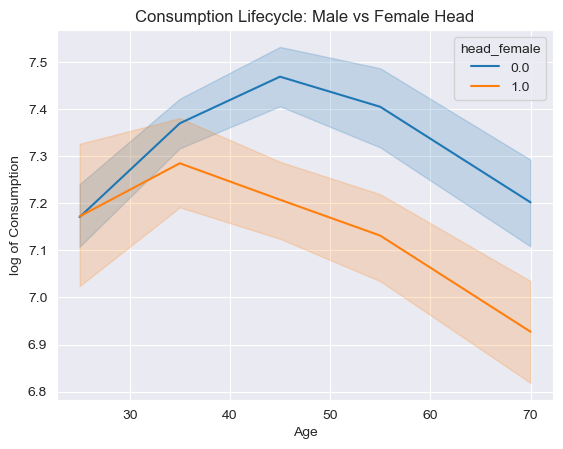

In [28]:
#Consumption Lifecycle: male vs female:

fig, ax = plt.subplots()
fig1 = sns.lineplot('age_bins', 'log_consumption', hue='head_female', data=data)
plt.title('Consumption Lifecycle: Male vs Female Head')
plt.ylabel('log of Consumption')
plt.xlabel('Age')
plt.show()


#### b. Plot the lifecycle of the log of income for households where the head is male and for households where the head is female.


C:\Users\icon8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


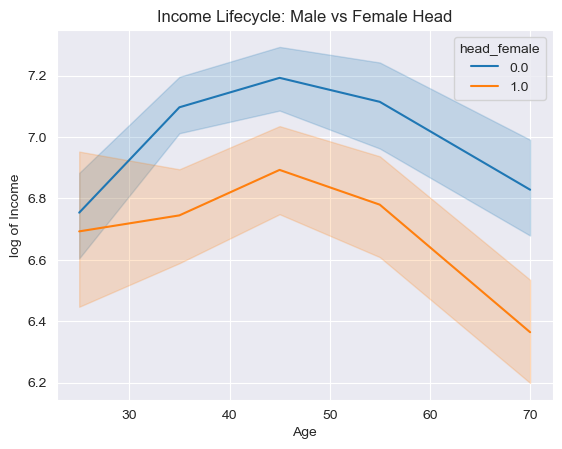

In [29]:
#Income Lifecycle: male vs female:

fig, ax = plt.subplots()
fig1 = sns.lineplot('age_bins', 'log_income', hue='head_female', data=data)
plt.title('Income Lifecycle: Male vs Female Head')
plt.ylabel('log of Income')
plt.xlabel('Age')
plt.show()

#### c. Plot the lifecycle of the log of wealth for households where the head is male and for households where the head is female.


C:\Users\icon8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


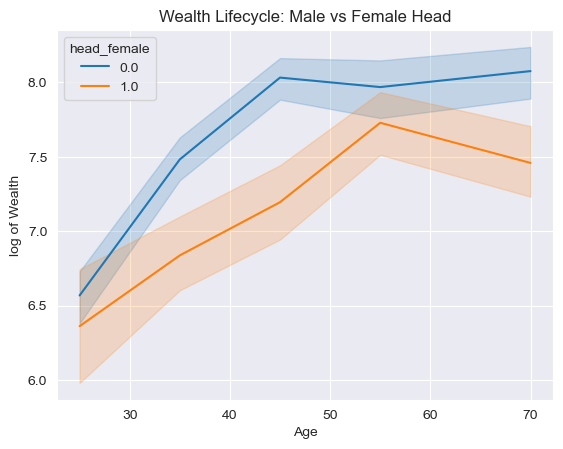

In [30]:
#wealth Lifecycle: male vs female

fig, ax = plt.subplots()
fig1 = sns.lineplot('age_bins', 'log_wealth', hue='head_female', data=data)
plt.title('Wealth Lifecycle: Male vs Female Head')
plt.ylabel('log of Wealth')
plt.xlabel('Age')
plt.show()

#### d. What are the differences in the lifecycle of households where the head is a male versus the head is a female?

We see that for log(c), log(w), and log(inc), lifecycle levels 
begin at similar levels, but grow much faster for male heads. The lower avg. consumption across head_age may reflect income effects (lower avg. income across lifecycle), greater childcare expenses, and spending patterns. The lower avg. income across lifecycle may reflect career interruptions for childbirth and family caregiving, as well as lower economic opportunities in the form of jobs and education.

After the mid-40s, wealth continues to grow weakly for male heads, while for female heads wealth peaks later but begins to decline in the mid-50s. This is reflected by a slightly faster decline of income relative to consumption (slightly steeper slope) that begins around these years. For male heads, consumption peaks about 10 years later (mid-40s), around the time their income peaks, reflecting the aforementioned income effects as well as credit access contingent on stable income. 

Improving economic opportunities available to women-- particularly jobs and access to education --will likely pull the female lifecycle of income closer to that of males, and through income effects, pull the lifecycle of consumption and wealth with it.